In [1]:
import sqlite3
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
import sqlalchemy

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import copy

%matplotlib inline
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings("ignore")

# SQL and Pandas
* [Reading a table from a SQL database into Pandas Dataframe](#Reading-a-table-from-a-SQL-database-into-Pandas-Dataframe)
* [Pandas Dataframe into SQL Table](#Pandas-Dataframe-into-SQL-Table)

## Reading a table from a SQL database into Pandas Dataframe
Read SQL *query* into a DataFrame [[Source](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.read_sql.html#pandas.read_sql)]. Syntax:

```pandas.read_sql_query(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)```

Read SQL *database table* into a DataFrame. Syntax:

```pandas.read_sql_table(table_name, con, schema=None, index_col=None, coerce_float=True, parse_dates=None, columns=None, chunksize=None)```

The first thing we need to do is to define an engine. Please see [this link](https://docs.sqlalchemy.org/en/13/core/engines.html) for doing so.

In [2]:
# Here we have a sqlite database
engine = sqlalchemy.create_engine('sqlite:///mydatabase.db')
df = pd.read_sql_table("Players", engine, index_col=None)
df.head()

,Rank,First_Name,Last_Name,Nationality,Goals,Birth_Date
0,1,Alan,Shearer,England,260,1970-08-13
1,2,Wayne,Rooney,England,208,1985-10-24
2,3,Andrew,Cole,England,187,1971-10-15
3,4,Frank,Lampard,England,177,1978-06-20
4,5,Thierry,Henry,France,175,1977-08-17


We can plot this 

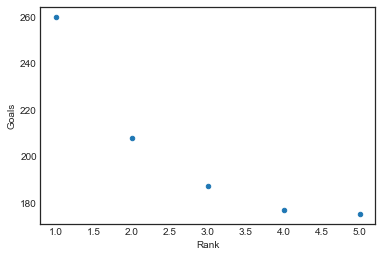

In [3]:
df.plot(x='Rank', y='Goals', kind='scatter')

Or get mor information about this Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
Rank           5 non-null int64
First_Name     5 non-null object
Last_Name      5 non-null object
Nationality    5 non-null object
Goals          5 non-null int64
Birth_Date     5 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 320.0+ bytes


In [5]:
df.describe()
#df.describe(include='all')

,Rank,Goals
count,5.000000,5.000000
mean,3.000000,201.400000
std,1.581139,35.274637
min,1.000000,175.000000
25%,2.000000,177.000000
50%,3.000000,187.000000
75%,4.000000,208.000000
max,5.000000,260.000000


This data can be processed using statistical tools and then the results can be pushed back to our SQL database.

## Pandas Dataframe into SQL Table

Consider the Premier League 2018-2019 season table [[Source](https://www.premierleague.com/tables?co=1&se=210&ha=-1)].

In [6]:
PL = pd.read_csv('../Data/PL18_19.csv')
PL.head()

,Club,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,Manchester City,38,32,2,4,95,23,72,98
1,Liverpool,38,30,7,1,89,22,67,97
2,Previous Position Chelsea,38,21,9,8,63,39,24,72
3,Tottenham Hotspur,38,23,2,13,67,39,28,71
4,Arsenal,38,21,7,10,73,51,22,70


We are going to write down this **Dataframe** in our SQL database. The following syntax can be used for doing so [[Source](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.to_sql.html)]

```DataFrame.to_sql(name, con, schema=None, if_exists='fail', index=True, index_label=None, chunksize=None, dtype=None)```

In [7]:
engine = sqlalchemy.create_engine('sqlite:///mydatabase.db')
#PL.to_sql('PL', engine)
PL.to_sql('PL', engine,if_exists='replace')

To check the results

In [8]:
engine.execute("SELECT * FROM PL").fetchall()

[(0, 'Manchester City', 38, 32, 2, 4, 95, 23, 72, 98),
 (1, 'Liverpool', 38, 30, 7, 1, 89, 22, 67, 97),
 (2, 'Previous Position Chelsea', 38, 21, 9, 8, 63, 39, 24, 72),
 (3, 'Tottenham Hotspur', 38, 23, 2, 13, 67, 39, 28, 71),
 (4, 'Arsenal', 38, 21, 7, 10, 73, 51, 22, 70),
 (5, 'Manchester United', 38, 19, 9, 10, 65, 54, 11, 66),
 (6, 'Wolverhampton Wanderers', 38, 16, 9, 13, 47, 46, 1, 57),
 (7, 'Everton', 38, 15, 9, 14, 54, 46, 8, 54),
 (8, 'Leicester City', 38, 15, 7, 16, 51, 48, 3, 52),
 (9, 'West Ham United', 38, 15, 7, 16, 52, 55, -3, 52),
 (10, 'Watford', 38, 14, 8, 16, 52, 59, -7, 50),
 (11, 'Crystal Palace', 38, 14, 7, 17, 51, 53, -2, 49),
 (12, 'Newcastle United', 38, 12, 9, 17, 42, 48, -6, 45),
 (13, 'Bournemouth', 38, 13, 6, 19, 56, 70, -14, 45),
 (14, 'Burnley', 38, 11, 7, 20, 45, 68, -23, 40),
 (15, 'Southampton', 38, 9, 12, 17, 45, 65, -20, 39),
 (16, 'Brighton and Hove Albion', 38, 9, 9, 20, 35, 60, -25, 36),
 (17, 'Cardiff City', 38, 10, 4, 24, 34, 69, -35, 34),
 (18,

We can read this table as a SQL table now.

In [9]:
connection = sqlite3.connect("mydatabase.db")
cursor = connection.cursor()
cursor.execute("SELECT * FROM PL") 
print("All rows:")
result = cursor.fetchall() 
for row in result:
    print(row)
del row
connection.close()

All rows:
(0, 'Manchester City', 38, 32, 2, 4, 95, 23, 72, 98)
(1, 'Liverpool', 38, 30, 7, 1, 89, 22, 67, 97)
(2, 'Previous Position Chelsea', 38, 21, 9, 8, 63, 39, 24, 72)
(3, 'Tottenham Hotspur', 38, 23, 2, 13, 67, 39, 28, 71)
(4, 'Arsenal', 38, 21, 7, 10, 73, 51, 22, 70)
(5, 'Manchester United', 38, 19, 9, 10, 65, 54, 11, 66)
(6, 'Wolverhampton Wanderers', 38, 16, 9, 13, 47, 46, 1, 57)
(7, 'Everton', 38, 15, 9, 14, 54, 46, 8, 54)
(8, 'Leicester City', 38, 15, 7, 16, 51, 48, 3, 52)
(9, 'West Ham United', 38, 15, 7, 16, 52, 55, -3, 52)
(10, 'Watford', 38, 14, 8, 16, 52, 59, -7, 50)
(11, 'Crystal Palace', 38, 14, 7, 17, 51, 53, -2, 49)
(12, 'Newcastle United', 38, 12, 9, 17, 42, 48, -6, 45)
(13, 'Bournemouth', 38, 13, 6, 19, 56, 70, -14, 45)
(14, 'Burnley', 38, 11, 7, 20, 45, 68, -23, 40)
(15, 'Southampton', 38, 9, 12, 17, 45, 65, -20, 39)
(16, 'Brighton and Hove Albion', 38, 9, 9, 20, 35, 60, -25, 36)
(17, 'Cardiff City', 38, 10, 4, 24, 34, 69, -35, 34)
(18, 'Fulham', 38, 7, 5, 26, 34